---

# 재배환경 별 작물 종류 예측

1. 문제 설명

    - 이상 기후, 온난화등의 문제로 기상 변화 문제로 농업의 생태계는 다양한 변화를 맞이하고 있습니다. 기후를 통제하여 안정적인 생산력을 유지하는 스마트팜과 더불어 변화하는 환경에 맞추어 적절한 작물을 찾는 시도도 필요하며, 본 과제를 통해 이러한 요구를 해결하고자 합니다. 데이터는 다음의 정보를 포함합니다. 주어진 환경정보를 통해 환경에 적합한 작물을 예측해봅시다.


2. 데이터 셋 구성
    - N - 토양 내 질소 함량 비율
    - P - 토양 내 인산 함량 비율
    - K - 토양 내 칼륨 함량 비율
    - temperature - 섭씨 온도
    - humidity - 상대 습도(%)
    - ph - 토양의 ph 값
    - rainfall - 강우량 (mm)

---
# sample, train, test 데이터 불러오고 형태 파악

- test, train 데이터 불러오기
- train데이터에서 정답인 label값을 y로 학습을 통해 훈련시킬 label을 제외한 값을 X로 지정

In [45]:
import pandas as pd
sample = pd.read_csv("sample_croptype.csv" , engine='python')
train = pd.read_csv("train_croptype.csv" , engine='python')
test = pd.read_csv("test_croptype.csv" , engine='python')

print(train.shape)
print(test.shape)

print(train.head())
print(test.head())

(1650, 8)
(550, 7)
    N    P    K  temperature   humidity        ph    rainfall        label
0  22   36   16    30.581395  50.771481  8.184229   64.585596    mothbeans
1  18   27   41    22.365094  92.308824  7.175344  104.821633  pomegranate
2  61   68   50    35.214628  91.497251  6.793245  243.074507       papaya
3  26   72   22    28.767949  37.577921  4.674942   91.720849   pigeonpeas
4   2  140  197    22.697801  92.822234  5.534567  105.050823        apple
     N    P    K  temperature   humidity        ph    rainfall
0  101   17   47    29.494014  94.729813  6.185053   26.308209
1   98    8   51    26.179346  86.522581  6.259336   49.430510
2   59   62   49    43.360515  93.351916  6.941497  114.778071
3   44   60   55    34.280461  90.555616  6.825371   98.540477
4   30  137  200    22.914300  90.704756  5.603413  118.604465


In [46]:
print(train.shape)
X = train.drop('label', axis=1)
y = train['label']
print(X.shape)
print(y.shape)

(1650, 8)
(1650, 7)
(1650,)


---
# 데이터 카테고리의 실수화 진행

- 구해야할 카테고리가 범수형 이므로 LabelEncoder 클래스 사용
- label에는 22가지의 식물이 구별되어 있음

In [47]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

classle = LabelEncoder()

y = classle.fit_transform(train['label'].values)

print('species labels : ', np.unique(y))

yo = classle.inverse_transform(y)
print('species : ', np.unique(yo))

species labels :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
species :  ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


# 데이터 분할을 통해 train, test 분할

-  train_test_split을 통하여 default 구성으로 분류
- 분류 후 분류된 형태 출력 및 확인


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)  

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(1155, 7)
(495, 7)
(1155,)
(495,)


---
# 데이터 표준화

In [49]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(X_train.head())
X_train_std[1:5,]


       N    P    K  temperature   humidity        ph    rainfall
863   10  140  197    22.169395  90.271856  6.229499  124.468311
860   93   58   38    20.615214  83.773456  6.932400  279.545172
1386   2   30   30    26.001751  94.799984  6.331052  209.540094
912   40   29   42    24.632287  89.015745  7.104095  110.695618
1108  30   63   16    23.605066  21.905396  5.525905  100.597873


array([[ 1.13103497,  0.13350767, -0.19597669, -0.95897667,  0.55161693,
         0.59631103,  3.16862127],
       [-1.31253901, -0.71077038, -0.35256823,  0.10062451,  1.0552656 ,
        -0.17256517,  1.9116191 ],
       [-0.29214548, -0.74092317, -0.11768092, -0.16876672,  0.79106418,
         0.8158376 ,  0.1367804 ],
       [-0.56067009,  0.2842716 , -0.62660343, -0.37083439, -2.2742739 ,
        -1.20201565, -0.04453342]])

---
# 모델 추정 및 사례중심 학습

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors =5, p=2)
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [51]:
y_train_pred = knn.predict(X_train_std)

y_test_pred = knn.predict(X_test_std)
print('Misclassified training samples: %d' %(y_train!=y_train_pred).sum()) #오분류 데이터 갯수 확인
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum()) #오분류 데이터 갯수 확인

Misclassified training samples: 17
Misclassified test samples: 19


---
# 결과 분석


In [52]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_pred))

0.9616161616161616


In [53]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_true=y_test,y_pred=y_test_pred) 
print(conf)

[[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  1  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

---
# 표준화 처리 없이 하면


In [54]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
y_train_pred=knn.predict(X_train) 
y_test_pred=knn.predict(X_test)  
print('Misclassified training samples: %d' %(y_train!=y_train_pred).sum()) 
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum()) 

Misclassified training samples: 12
Misclassified test samples: 11


In [56]:
from sklearn.metrics import accuracy_score    
print(accuracy_score(y_test,y_test_pred))

0.9777777777777777


In [57]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_true=y_test,y_pred=y_test_pred) 
print(conf)

[[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

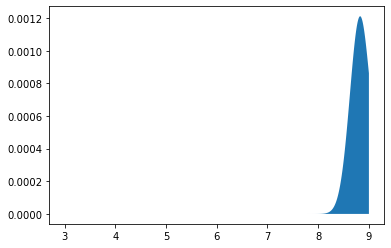

In [58]:
import matplotlib.pyplot as plt 
import numpy as np              
xx=X['temperature'].values 
xx=xx.T.reshape(-1, 1) # reshape
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=0.2, kernel='gaussian')
kd.fit(xx)
xx_d = np.linspace(3, 9, 1000)
logprob=kd.score_samples(xx_d.reshape(-1, 1)) 
plt.fill_between(xx_d, np.exp(logprob))

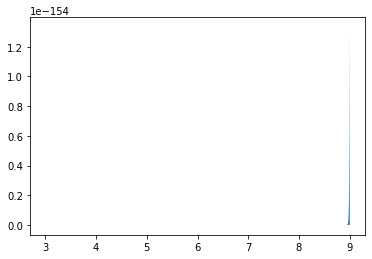

In [59]:
import matplotlib.pyplot as plt 
import numpy as np              
xx=X['humidity'].values 
xx=xx.T.reshape(-1, 1) # reshape
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=0.2, kernel='gaussian')
kd.fit(xx)
xx_d = np.linspace(3, 9, 1000)
logprob=kd.score_samples(xx_d.reshape(-1, 1)) 
plt.fill_between(xx_d, np.exp(logprob))

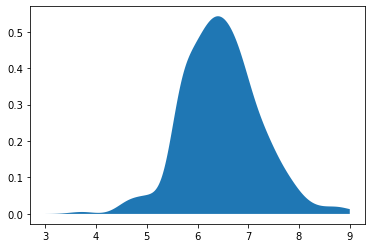

In [60]:
import matplotlib.pyplot as plt 
import numpy as np              
xx=X['ph'].values 
xx=xx.T.reshape(-1, 1) # reshape
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=0.2, kernel='gaussian')
kd.fit(xx)
xx_d = np.linspace(3, 9, 1000)
logprob=kd.score_samples(xx_d.reshape(-1, 1)) 
plt.fill_between(xx_d, np.exp(logprob))

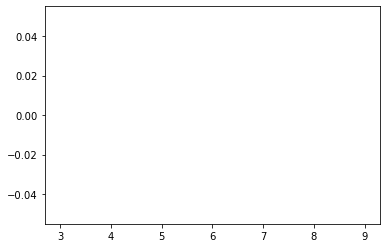

In [61]:
import matplotlib.pyplot as plt 
import numpy as np              
xx=X['rainfall'].values 
xx=xx.T.reshape(-1, 1) # reshape
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=0.2, kernel='gaussian')
kd.fit(xx)
xx_d = np.linspace(3, 9, 1000)
logprob=kd.score_samples(xx_d.reshape(-1, 1)) 
plt.fill_between(xx_d, np.exp(logprob))

---
#  전체 코드 및 SAMPLE 데이터 학습

In [63]:
#X_train = train.drop(['label'], axis =1)
#X_test = test
#y_train = train['label']

#knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)

sample['label']=y_test_pred
sample.to_csv('complete_croptype.csv', index=False)